# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

# Importing dataset

In [3]:
# Reading raw data
path_1 = r'..\Raw data\Aaklan_rawdata.csv'
df_1 = pd.read_csv(path_1)

# Setting up datetime column
df_1['timestamp'] = df_1['timestamp'].map(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df_1['day'] = df_1['timestamp'].apply(lambda x: x.day)
df_1['month'] = df_1['timestamp'].apply(lambda x: x.month)
df_1['year'] = df_1['timestamp'].apply(lambda x: x.year)
df_1['date'] = df_1['timestamp'].apply(lambda x: datetime.date(x))
df_1 = df_1.drop(labels = 'timestamp', axis = 1)

# Calculating total scores
df_1['A2_total'] = df_1.iloc[:,4:11].sum(axis = 1)
df_1['A1_total'] = df_1.iloc[:,18:25].sum(axis = 1)

# Declaring stirng variables
df_1['district'] = df_1['district'].apply(lambda x: str(x).lower().strip())

In [4]:
# Reading district data
path_2 = r'..\Raw data\District_data.csv'
df_2 = pd.read_csv(path_2)

# Declaring string variables
df_2['district'] = df_2['district'].apply(lambda x: str(x).lower().strip())

In [5]:
df_1.head()

,batch,name,ph_no,district,A2_Q1_R/W,A2_Q2_R/W,A2_Q3_R/W,A2_Q4_R/W,A2_Q5_R/W,A2_Q6_R/W,A2_Q7_R/W,A2_Q1_Abs,A2_Q2_Abs,A2_Q3_Abs,A2_Q4_Abs,A2_Q5_Abs,A2_Q6_Abs,A2_Q7_Abs,A1_Q1_R/W,A1_Q2_R/W,A1_Q3_R/W,A1_Q4_R/W,A1_Q5_R/W,A1_Q6_R/W,A1_Q7_R/W,A1_Q1_Abs,A1_Q2_Abs,A1_Q3_Abs,A1_Q4_Abs,A1_Q5_Abs,A1_Q6_Abs,A1_Q7_Abs,day,month,year,date,A2_total,A1_total
0,Agra_10_12,vs_1,6397387939,agra,0,1,0,0,1,1,0,3,2,2,1,3,1,3,0,1,1,0,1,1,1,3,2,1,4,3,1,1,10,12,2024,2024-12-10,3,5
1,Agra_10_12,vs_2,6398905390,agra,1,1,1,0,1,1,0,1,2,1,1,3,1,3,1,1,1,0,1,1,1,1,2,1,1,3,1,1,10,12,2024,2024-12-10,5,6
2,Agra_10_12,vs_3,7078958291,agra,1,0,0,0,1,1,1,1,1,4,1,3,1,1,1,0,0,0,0,1,0,1,1,4,4,1,1,3,10,12,2024,2024-12-10,4,2
3,Agra_10_12,vs_4,7302305427,agra,1,0,1,0,1,1,1,1,1,1,1,3,1,1,0,0,1,1,1,1,0,2,1,1,3,3,1,2,10,12,2024,2024-12-10,5,4
4,Agra_10_12,vs_5,7505846632,agra,1,1,1,0,1,1,0,1,2,1,1,3,1,3,1,1,1,0,1,1,0,1,2,1,1,3,1,3,10,12,2024,2024-12-10,5,5


In [6]:
df_2.head()

,district,Number of Vidyut Sakhis Trained,DRP Presence,DMM Presence,N-BMM Presence,DISCOM officials presence,DMM First Phase Presence,Commission/VS_INR,Average Bill Amount_INR,Number of VS working,Percent_Training Target Achieved,DISCOM
0,agra,155,1,1,1,0,1,47552,2359,69,0.80,DVVNL
1,aligarh,186,0,1,1,0,0,13135,1321,94,0.89,DVVNL
2,ambedkar nagar,123,1,1,1,1,1,11755,1418,133,0.82,MVVNL
3,amethi,104,0,1,1,0,1,26859,1943,119,0.93,MVVNL
4,amroha,27,0,1,1,0,1,7804,5395,93,0.77,PVVNL


In [9]:
a = df_1['district'].unique()
b = df_2['district'].unique()

In [10]:
[x for x in a if x not in b]

['hathras', 'jalaun']

# Descriptive statistics

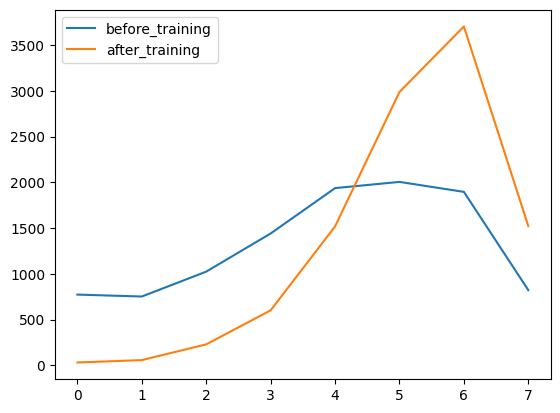

In [11]:
plt.plot(df_1['A1_total'].value_counts().sort_index(),label = 'before_training')
plt.plot(df_1['A2_total'].value_counts().sort_index(),label = 'after_training')
plt.legend()

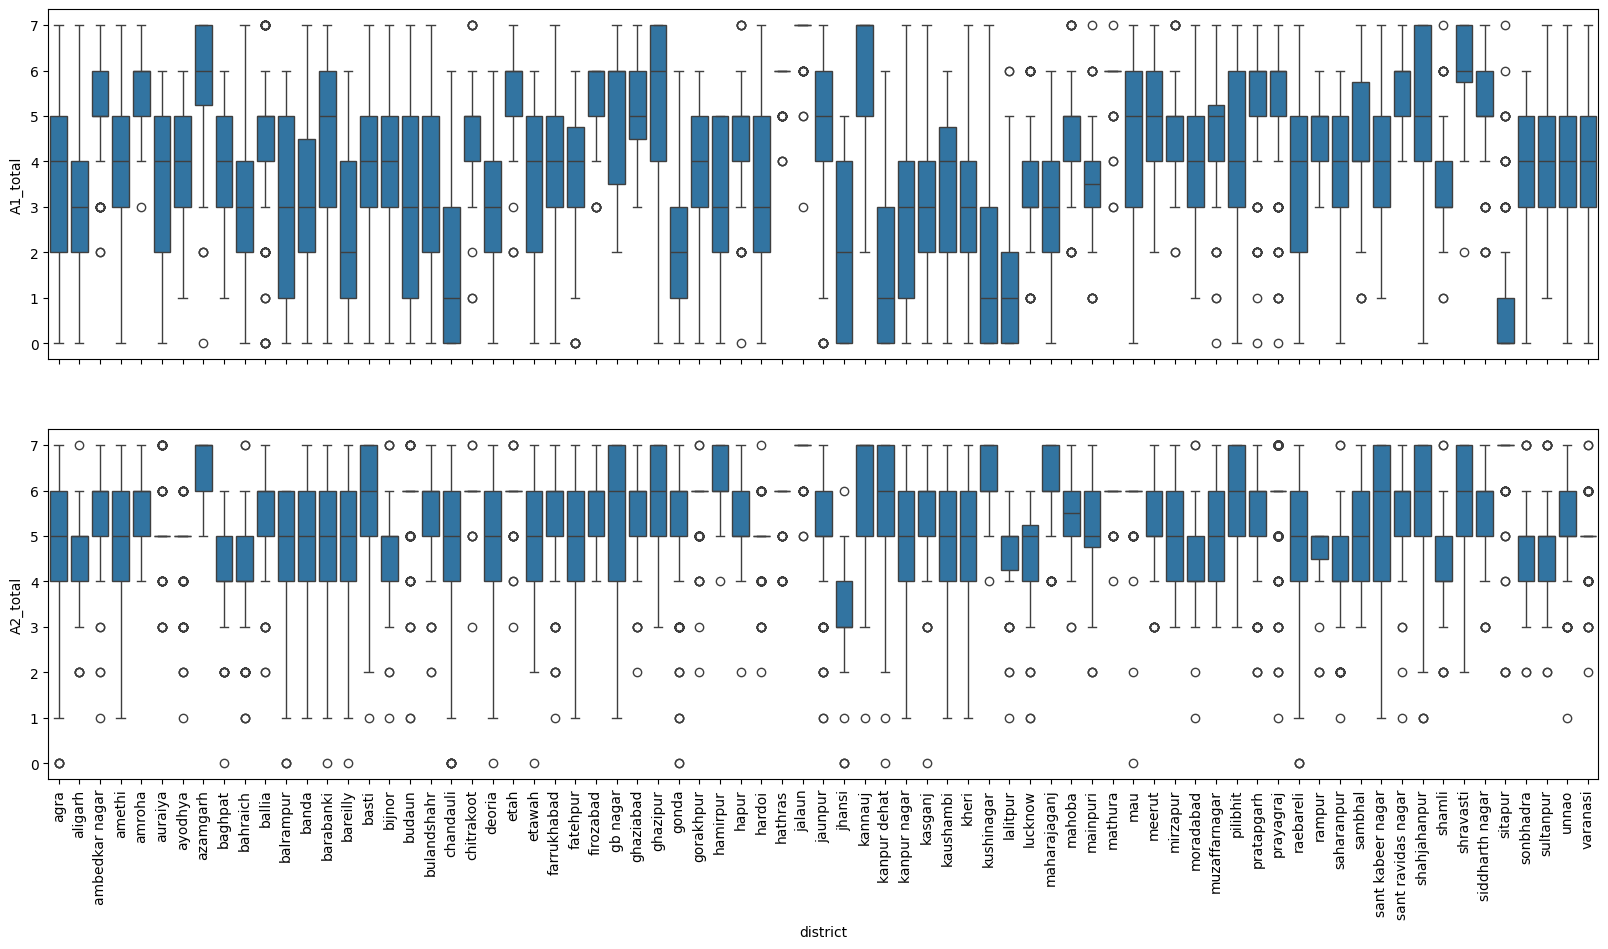

Some districts have no variation at all. This data needs cleaning


In [ ]:
# Plotting district wise distribution of scores
fig, axs = plt.subplots(nrows = 2, figsize = (20,10), sharex=True)
sns.boxplot(data = df_1, x = 'district', y = 'A1_total', ax = axs[0])
sns.boxplot(data = df_1, x = 'district', y = 'A2_total', ax = axs[1])
plt.xticks(rotation = 90)
plt.show()
print("Some districts have no variation at all. This data needs cleaning")


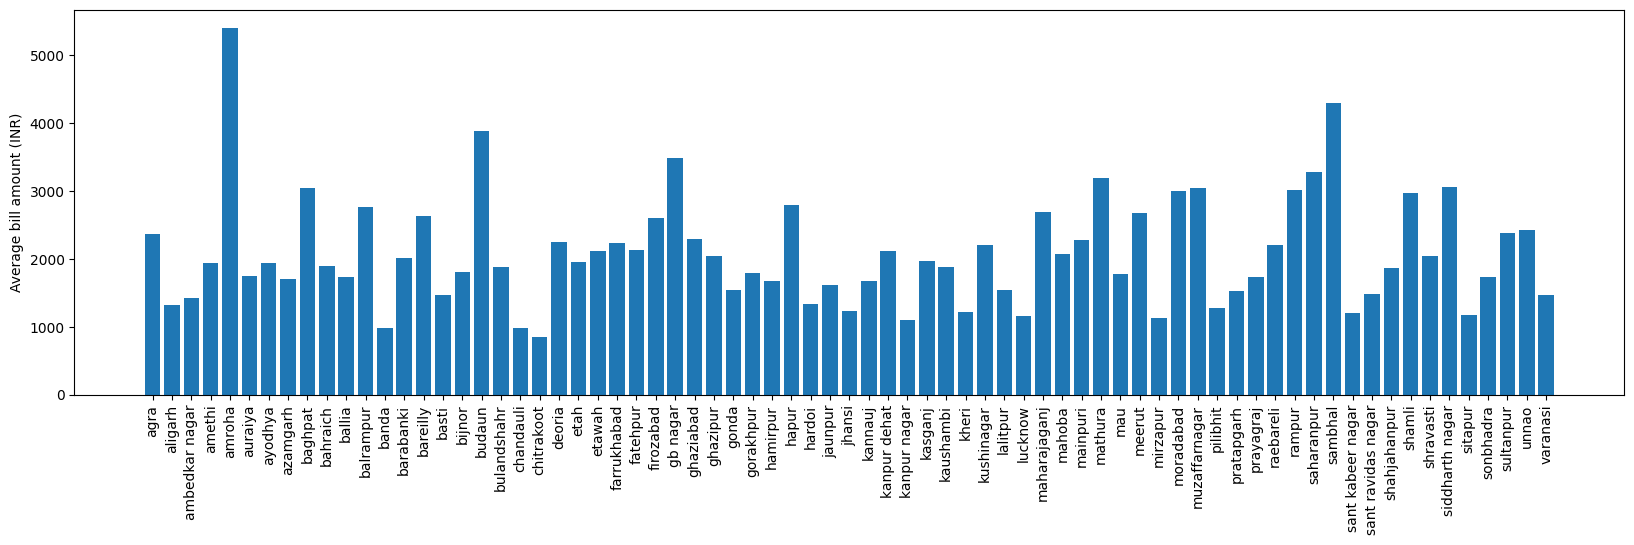

In [ ]:
# Plotting variation in district wise bill amount
plt.figure(figsize=(20,5))
plt.bar(x = df_2['district'].values, height = df_2['Average Bill Amount_INR'].values)
plt.xticks(rotation = 90)
plt.ylabel("Average bill amount (INR)")
plt.show()

In [35]:
df_2.columns

Index(['district', 'Number of Vidyut Sakhis Trained', 'DRP Presence',
       'DMM Presence', 'N-BMM Presence', 'DISCOM officials presence',
       'DMM First Phase Presence', 'Commission/VS_INR',
       'Average Bill Amount_INR', 'Number of VS working',
       'Percent_Training Target Achieved', 'DISCOM'],
      dtype='object')

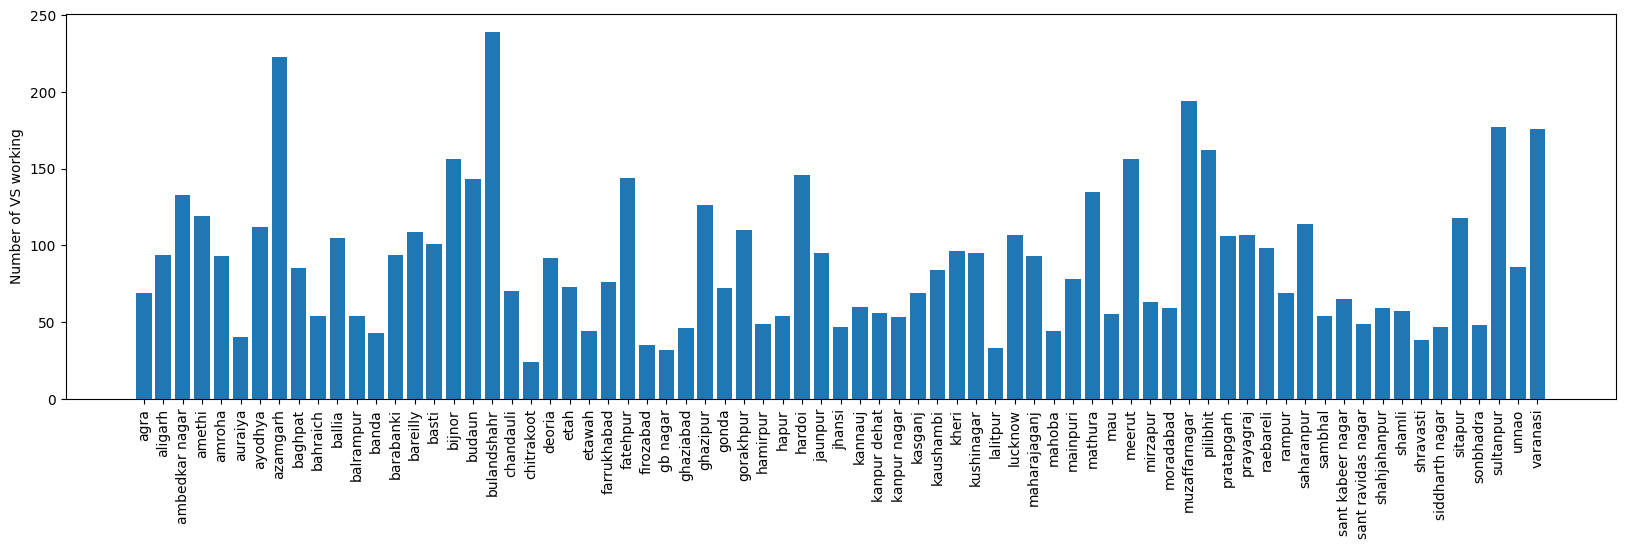

In [38]:
# Plotting variation in district wise number of VS working
plt.figure(figsize=(20,5))
plt.bar(x = df_2['district'].values, height = df_2['Number of VS working'].values)
plt.xticks(rotation = 90)
plt.ylabel("Number of VS working")
plt.show()

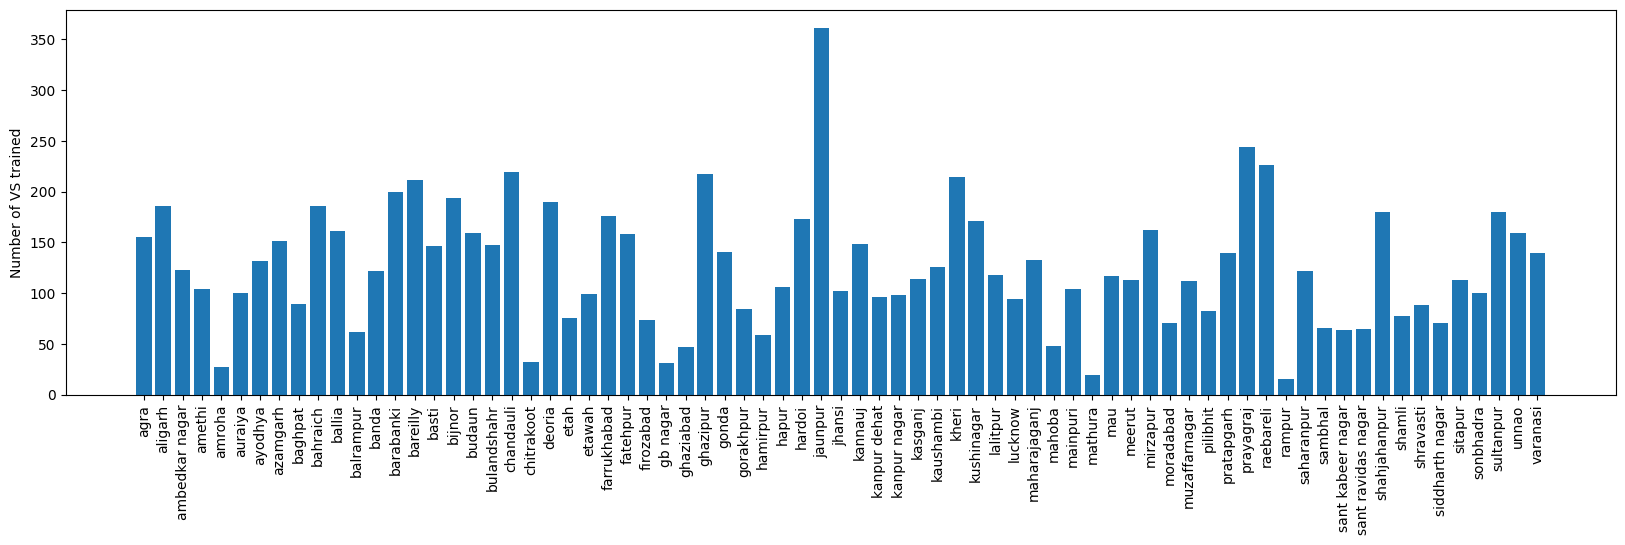

In [37]:
# Plotting variation in district wise number of VS trained
plt.figure(figsize=(20,5))
plt.bar(x = df_2['district'].values, height = df_2['Number of Vidyut Sakhis Trained'].values)
plt.xticks(rotation = 90)
plt.ylabel("Number of VS trained")
plt.show()

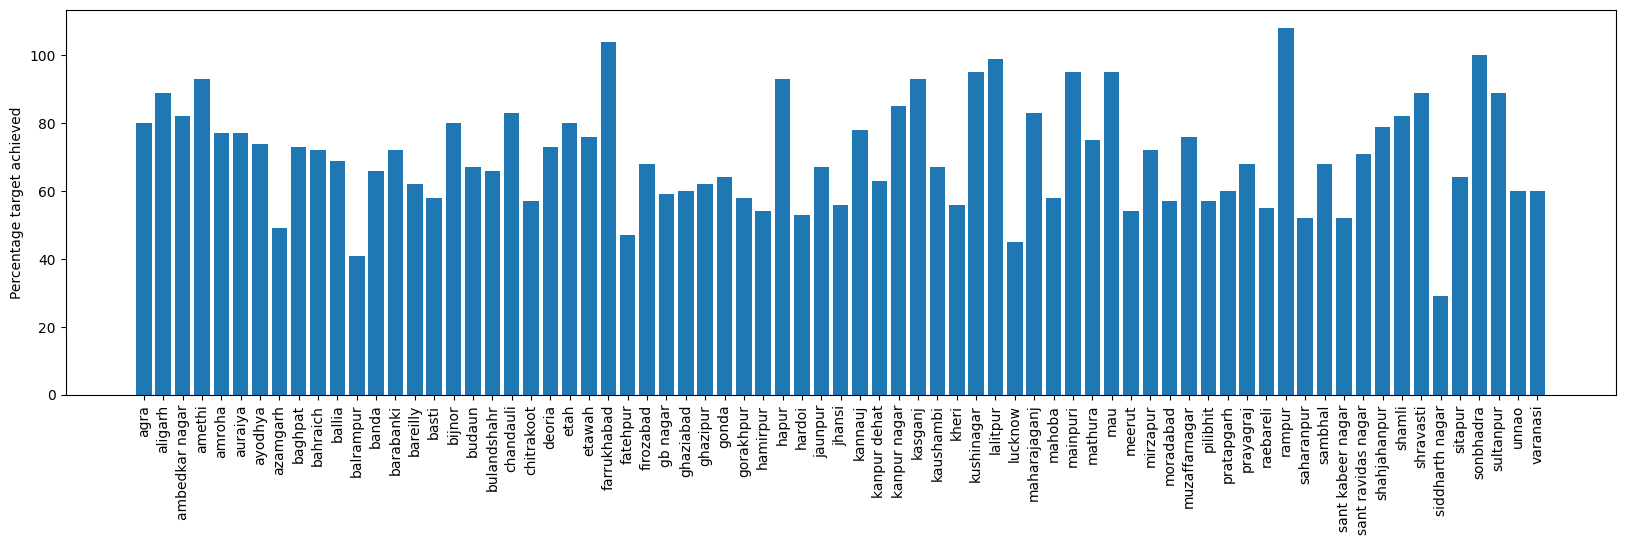

In [40]:
# Plotting variation in district wise percentage training achieved
plt.figure(figsize=(20,5))
plt.bar(x = df_2['district'].values, height = df_2['Percent_Training Target Achieved'].values*100)
plt.xticks(rotation = 90)
plt.ylabel("Percentage target achieved")
plt.show()

<Axes: xlabel='DISCOM', ylabel='Number of Vidyut Sakhis Trained'>

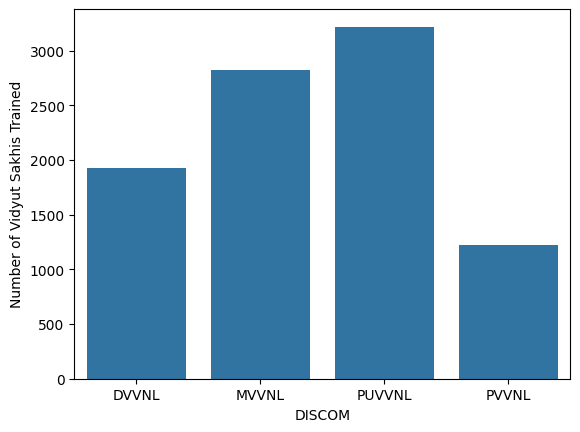

In [ ]:
# Plotting variationin discom wise training 
sns.barplot(df_2.groupby('DISCOM')['Number of Vidyut Sakhis Trained'].sum())

In [43]:
df_2.columns

Index(['district', 'Number of Vidyut Sakhis Trained', 'DRP Presence',
       'DMM Presence', 'N-BMM Presence', 'DISCOM officials presence',
       'DMM First Phase Presence', 'Commission/VS_INR',
       'Average Bill Amount_INR', 'Number of VS working',
       'Percent_Training Target Achieved', 'DISCOM'],
      dtype='object')

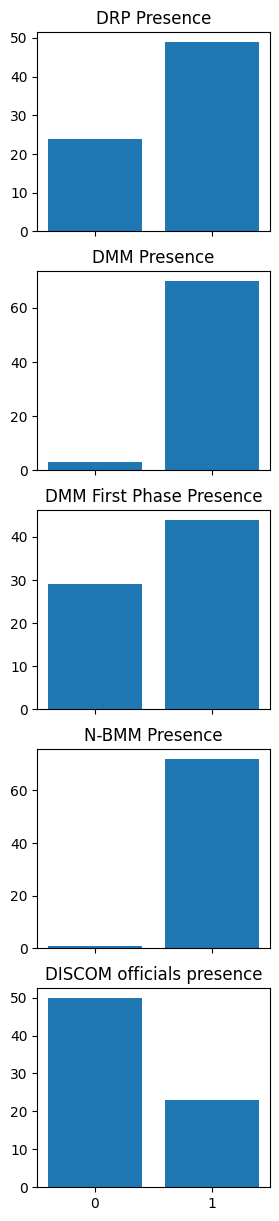

In [73]:
fig, axs = plt.subplots(nrows=5,ncols=1, figsize = (3,15), sharex=True)
axs[0].bar(x = df_2['DRP Presence'].value_counts().sort_index().index, height = df_2['DRP Presence'].value_counts().sort_index().values)
axs[0].set_title('DRP Presence')

axs[1].bar(x = df_2['DMM Presence'].value_counts().sort_index().index, height = df_2['DMM Presence'].value_counts().sort_index().values)
axs[1].set_title('DMM Presence')

axs[3].bar(x = df_2['N-BMM Presence'].value_counts().sort_index().index, height = df_2['N-BMM Presence'].value_counts().sort_index().values)
axs[3].set_title('N-BMM Presence')

axs[4].bar(x = df_2['DISCOM officials presence'].value_counts().sort_index().index, height = df_2['DISCOM officials presence'].value_counts().sort_index().values)
axs[4].set_title('DISCOM officials presence')

axs[2].bar(x = df_2['DMM First Phase Presence'].value_counts().sort_index().index, height = df_2['DMM First Phase Presence'].value_counts().sort_index().values)
axs[2].set_title('DMM First Phase Presence')
axs[2].set_xticks(ticks = [0,1])

plt.show()

In [44]:
df_2['DRP Presence'].value_counts()

DRP Presence
1    49
0    24
Name: count, dtype: int64